In [27]:
from datasets import load_dataset
import csv
from pathlib import Path
import random
import re
import pandas as pd 
import matplotlib.pyplot as plt

In [22]:
DATASET_NAME = "MoyYuan/Asymmetricity-Text-NLI"
TARGET_PER_CLASS = 5_000

ds_train = load_dataset(DATASET_NAME, split="train")
ds_test = load_dataset(DATASET_NAME, split="test")

df_train = ds_train.to_pandas()
df_test = ds_test.to_pandas()

In [39]:
relations = ["is a child of",
             "partially overlaps with",
             "is a type of",
             "is a sibling of",
             "is an equivalent name of",
             "is located in",
             "is the mother of",
             "is the father of",
             "possibly the same as",
             "has part(s) that are instances of",
             "led to",
             "is different from",
             "is part of",
             "caused by"]

symmetry = {"is a child of": 0,
             "partially overlaps with": 1,
             "is a type of": 0,
             "is a sibling of": 1,
             "is an equivalent name of": 1,
             "is located in": 0,
             "is the mother of": 0,
             "is the father of": 0,
             "possibly the same as": 1,
             "has part(s) that are instances of": 0,
             "led to": 0,
             "is different from": 1,
             "is part of": 0,
             "caused by": 0}

text_col = "premise" 
df_train[text_col] = df_train[text_col].astype(str).str.lower()

def find_relation(text):
    for rel in relations:
        if rel in text:
            return rel
    return None

df_train["found_relation"] = df_train[text_col].apply(find_relation)

matches = df_train[df_train["found_relation"].notna()]

relation_counts = matches["found_relation"].value_counts().reset_index()
relation_counts.columns = ["relation", "count"]


relation_counts["symmetric"] = relation_counts["relation"].map(symmetry)

summary = (
    relation_counts.groupby("symmetric")["count"]
    .sum()
    .reset_index()
    .replace({"symmetric": {0: "Asymmetric", 1: "Symmetric"}})
)

print("Counts per relation:")
print(relation_counts)
print("\nSummary of symmetry:")
print(summary)


print(f"Found {len(matches)} matches out of {len(df_train)} sentences.")

Counts per relation:
                             relation   count  symmetric
0                     is a sibling of  113439          1
1                       is located in  111032          0
2                   is different from   23195          1
3                possibly the same as   17599          1
4                          is part of   16665          0
5                        is a type of   11649          0
6                       is a child of    7796          0
7                    is the father of    5924          0
8                    is the mother of    1946          0
9             partially overlaps with     346          1
10           is an equivalent name of     281          1
11  has part(s) that are instances of     136          0
12                          caused by     130          0
13                             led to      80          0

Summary of symmetry:
    symmetric   count
0  Asymmetric  155358
1   Symmetric  154860
Found 310218 matches out of 310218 s

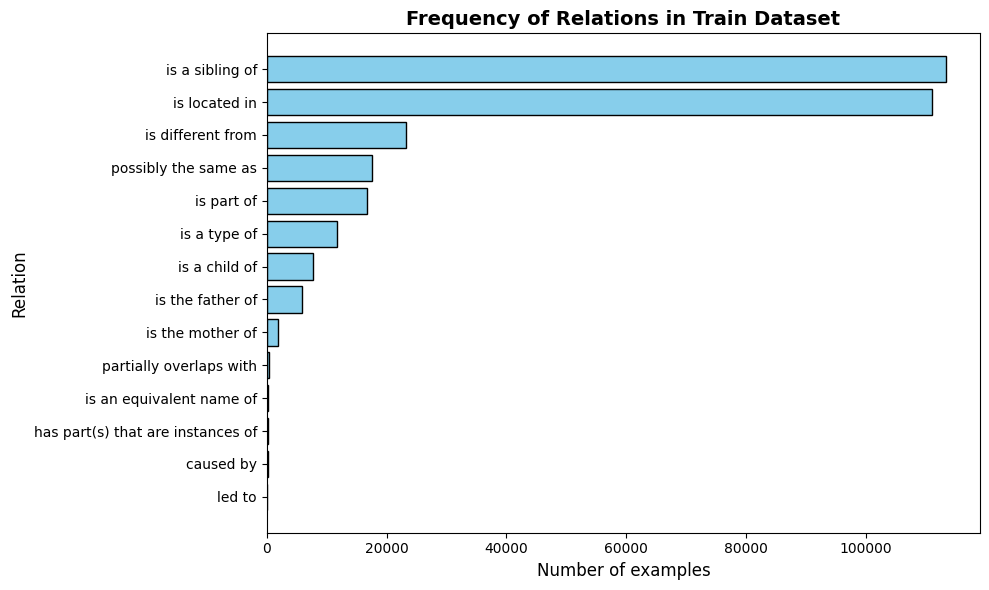

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(relation_counts["relation"], relation_counts["count"], color="skyblue", edgecolor="black")
plt.xlabel("Number of examples", fontsize=12)
plt.ylabel("Relation", fontsize=12)
plt.title("Frequency of Relations in Train Dataset", fontsize=14, weight="bold")
plt.gca().invert_yaxis()  # Puts the largest counts at the top
plt.tight_layout()
plt.show()

In [40]:
df_test[text_col] = df_test[text_col].astype(str).str.lower()

def find_relation(text):
    for rel in relations:
        if rel in text:
            return rel
    return None

df_test["found_relation"] = df_test[text_col].apply(find_relation)

matches = df_test[df_test["found_relation"].notna()]
relation_counts = matches["found_relation"].value_counts().reset_index()
relation_counts.columns = ["relation", "count"]

relation_counts["symmetric"] = relation_counts["relation"].map(symmetry)

# Compute totals by symmetry type
summary = (
    relation_counts.groupby("symmetric")["count"]
    .sum()
    .reset_index()
    .replace({"symmetric": {0: "Asymmetric", 1: "Symmetric"}})
)

print("Counts per relation:")
print(relation_counts)
print("\nSummary of symmetry:")
print(summary)

print(f"Found {len(matches)} matches out of {len(df_test)} sentences.")

Counts per relation:
                             relation  count  symmetric
0                     is a sibling of  37775          1
1                       is located in  37178          0
2                   is different from   7707          1
3                possibly the same as   5851          1
4                          is part of   5457          0
5                        is a type of   3771          0
6                       is a child of   2574          0
7                    is the father of   1948          0
8                    is the mother of    668          0
9             partially overlaps with    118          1
10           is an equivalent name of     75          1
11                          caused by     52          0
12  has part(s) that are instances of     42          0
13                             led to     30          0

Summary of symmetry:
    symmetric  count
0  Asymmetric  51720
1   Symmetric  51526
Found 103246 matches out of 103246 sentences.


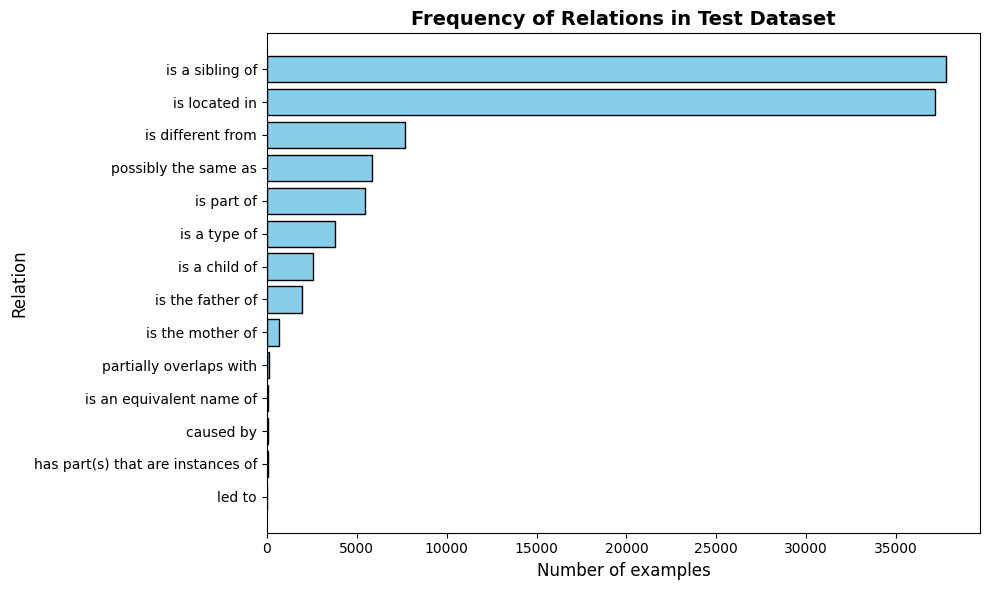

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(relation_counts["relation"], relation_counts["count"], color="skyblue", edgecolor="black")
plt.xlabel("Number of examples", fontsize=12)
plt.ylabel("Relation", fontsize=12)
plt.title("Frequency of Relations in Test Dataset", fontsize=14, weight="bold")
plt.gca().invert_yaxis()  # Puts the largest counts at the top
plt.tight_layout()
plt.show()